## Definations

- **Parameter**: Values learned by the model during training (e.g., weights, biases).  

- **Hyperparameter**: Values set before training to control the learning process (e.g., learning rate, batch size).

- **Loss Function:** A loss function measures how far the model's predictions are from the true values. It helps the model understand its mistakes.

- **Optimizer:** An optimizer is an algorithm that updates the model's parameters (weights and biases) to reduce the loss and improve accuracy.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Activation Functions (General notes):


*   **sigmoid**: (0 to 1), output layer, binary classification
*   **tanh**: (-1 to +1), hidden layer
*   **ReLU**: (0 to ∞), general purpose
*   **Leaky ReLU**: (-∞ to +∞), hidden layer, prevents dead neurons
*   **Softmax** (0 to 1, sums to 1), output layer, multiclass classification



### Typical Values



*   **Number of hidden layers:** minimum = 1, maximum = unlimited; (depends on problem)
*   **Neurons per hidden layer:** roughly 10 to 100 (depends on problem)
*   **Hidden/Output Activation:** listed on top.
*   **Loss function:** MSE (Mean Squared Error) / MAE (Mean Absolute Error)
*   **Optimizer:** SGD (Stochastic Gradient Descent), Adam



In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Creating data to view and fit
#### As I am working on a regression problem, creating some linear data (straight line) to model.

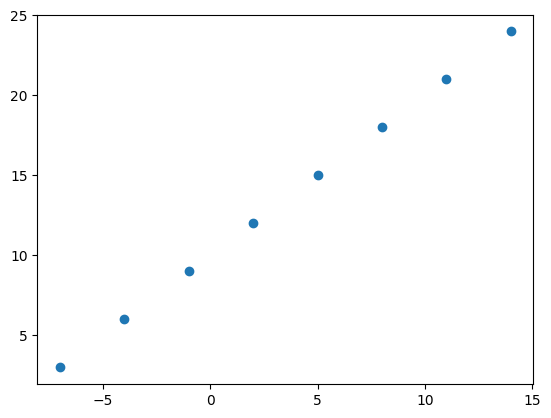

In [3]:
# Creating features
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Creating labels
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualizing it
plt.scatter(X, y)

# Steps in modelling with TensorFlow

In TensorFlow, there are typically 3 fundamental steps to create and train a model:

1. Creating the model: Building the neural network architecture or utilizing a pre-trained model.

2. Compiling the model: Defining the loss function, evaluation metrics, and optimization strategy.

3. Fitting the model: Training the model on the dataset to learn patterns and relationships.




In [4]:
# setting random seed
tf.random.set_seed(42)

# creating the model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)  # the layer will output a single value for each input sample
])

# compiling the model
model.compile(loss=tf.keras.losses.mae, # mae = mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD = stochastic gradient descent
              metrics=["mae"])

# fitting the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # model is expecting 2D array, expand_dims() is making 1D array into 2D

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step - loss: 10.9427 - mae: 10.9427
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 10.8102 - mae: 10.8102
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 10.6777 - mae: 10.6777
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 10.5452 - mae: 10.5452
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 10.4127 - mae: 10.4127


In [5]:
# checking out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [6]:
# making a prediction with the model
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[15.446365]], dtype=float32)

###### The output should have close to 27.

# Improving a model



* **Creating**: Adding more layers, increasing number of hidden layers (neurons), or changing activation functions.  
* **Compiling**: Trying different optimizers or adjusting the learning rate.  
* **Fitting**: Training for more epochs or using more data.  

In [7]:
# setting random seed
tf.random.set_seed(42)

# creating the model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compiling the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# fitting the model (this time I'm gonna train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step - loss: 11.0931 - mae: 11.0931
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 10.9606 - mae: 10.9606
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 10.8281 - mae: 10.8281
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 10.6956 - mae: 10.6956
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 10.5631 - mae: 10.5631
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 10.4306 - mae: 10.4306
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 10.2981 - mae: 10.2981
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 10.1656 - mae: 10.1656
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 10.0331 - mae: 10.0331
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.9006 - mae: 9.9006
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 9.7681 - mae: 9.7681
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 9.6356 - mae: 9.6356
Epoch 13/100
1/1 ━━━━━━━━━━━━

In [8]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[29.76822]], dtype=float32)

###### Better than before. However, the correct answer is 27 (y = x+10).

### Creating another custom dataset

In [9]:
# making a bigger dataset
x = np.arange(-100, 100, 4)
x

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [10]:
# making labels for the dataset
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [11]:
# same result as above
y = x+10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

# Split data

- **Training set**: Used to teach the model.  
- **Validation set**: Used to check the model’s performance during training.  
- **Test set**: Used to evaluate the model.  

In [12]:
len(x)

50

In [13]:
# spliting data into train and test sets
x_train = x[:40] # first 40 examples (80% data)
y_train = y[:40]

x_test = x[40:] # last 10 examples (20% data)
y_test = y[40:]

len(x_train), len(x_test)

(40, 10)

# Visualizing the data

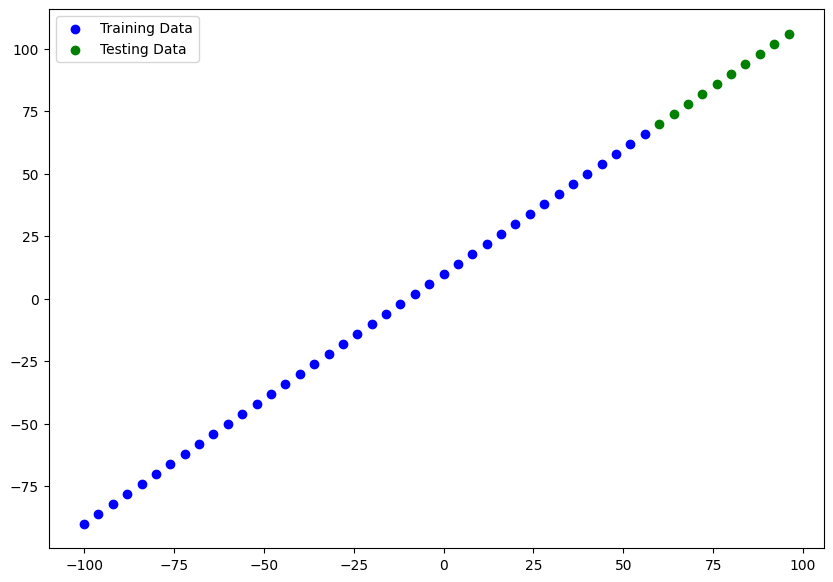

In [14]:
plt.figure(figsize=(10,7))

# ploting training data in blue
plt.scatter(x_train, y_train, c='b', label='Training Data')

# plotting test data in green
plt.scatter(x_test, y_test, c='g', label='Testing Data')

# showing the legend
plt.legend()

#### Now I am trying to build model which learns the pattern in the blue dots (X_train) to draw the green dots (X_test).

In [15]:
# setting random seed
tf.random.set_seed(42)

# creating the model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compiling the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# fitting the model (same as above)
# model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100) # commented out on purpose (not fitting it just yet)

# Visualizing the model
#### I can take a look at the layers and shapes of my model by calling summary() on it.

#### Visualizing a model is particularly helpful when you run into input and output shape mismatches.

In [16]:
# Doesn't work (model not fit/built)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#### The cell above errors because I haven't fit or built my model.

#### I also haven't told it what input shape it should be expecting.

In [17]:
# setting random seed
tf.random.set_seed(42)

# creating the model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # defining the input_shape to my model
])

# compiling the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fitting the model to the training data
model.fit(x_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

# This will work after specifying the input shape
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

* **Total params:** All parameters in the model.  
* **Trainable params:** Updated during training.  
* **Non-trainable params:** Stay fixed (e.g., from pre-trained models).
* **Optimizer params:** Hyperparameters controlling weight updates during training (e.g., learning rate, momentum, beta values).

#### Besides summary, we can also view a 2D plot of the model using plot_model().

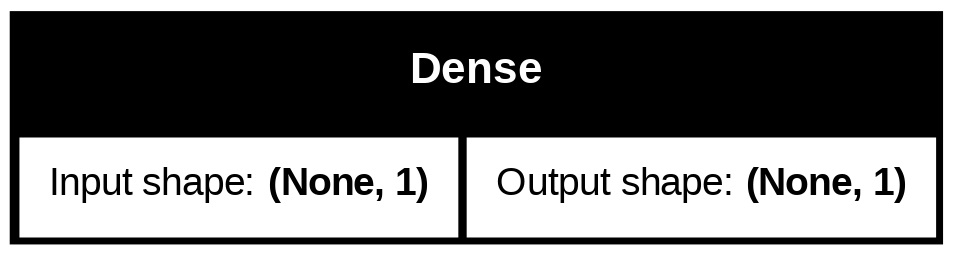

In [18]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

# Visualizing the predictions

In [19]:
# Make predictions
y_preds = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [20]:
# View the predictions
y_preds

array([[ 63.24342],
       [ 67.36569],
       [ 71.48796],
       [ 75.61023],
       [ 79.7325 ],
       [ 83.85477],
       [ 87.97704],
       [ 92.09931],
       [ 96.22158],
       [100.34385]], dtype=float32)

In [21]:
# plotting function

def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_preds):

  plt.figure(figsize=(10, 7))

  # Plotting training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  # Plotting test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show the legend
  plt.legend();

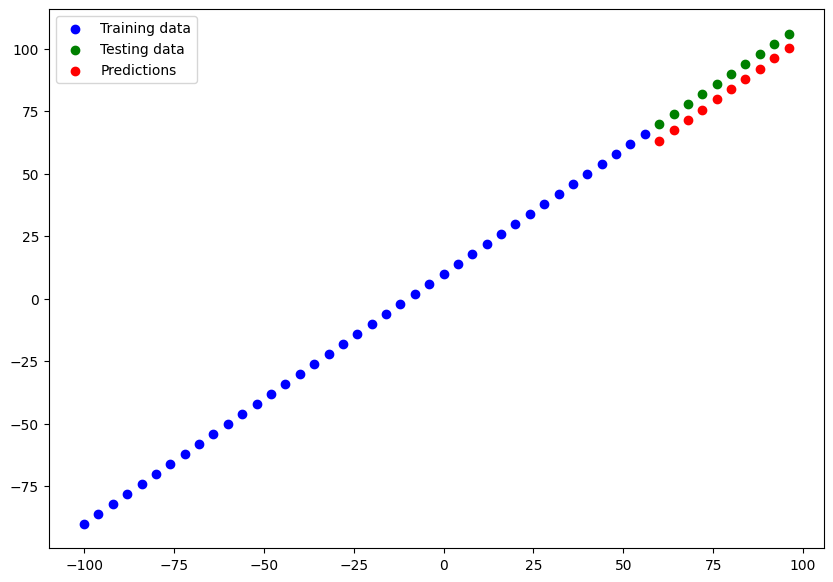

In [22]:
plot_predictions(train_data=x_train,
                 train_labels=y_train,
                 test_data=x_test,
                 test_labels=y_test,
                 predictions=y_preds)

# Evaluating predictions

In [23]:
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 6.2064 - mae: 6.2064


[6.206364631652832, 6.206364631652832]

#### TensorFlow has built in functions for MSE and MAE.

In [24]:
# Calculating the mean absolute error
mae = tf.keras.metrics.mae(y_test, y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([6.7565804, 6.634308 , 6.512039 , 6.3897705, 6.267502 , 6.145233 ,
       6.022957 , 5.900688 , 5.7784195, 5.656151 ], dtype=float32)>

#### MAE should be a single output. But it's showing different.

#### This is because my `y_test` and `y_preds` tensors are different shapes.

In [25]:
# Checking the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

In [26]:
# Shape after squeeze()
y_test.shape, y_preds.squeeze().shape

((10,), (10,))

In [27]:
# Calculating the MAE
mae = tf.keras.metrics.mae(y_test, y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=6.206364631652832>

In [28]:
# Calculating the MSE
mae = tf.keras.metrics.mse(y_test, y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=38.64229965209961>

# Running experiments to improve a model

#### There are many different ways to do this, but 3 of the main ones are:

1.  Getting more data

2.   Making the model larger (by using a more complex model) - more layers or more hidden units in each layer.

3.  Training for longer

#### (1) is not a good solution for real world dataset.

<br>

#### Therefore, I'll build 3 models and will compare their results:

`model_1` - same as original model, 1 layer, trained for 100 epochs.

`model_2` - 2 layers, trained for 100 epochs.

`model_3` - 2 layers, trained for 500 epochs.





####**model_1**

In [29]:
# Setting random seed
tf.random.set_seed(42)

# Replicating original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compiling the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fitting the model
model_1.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


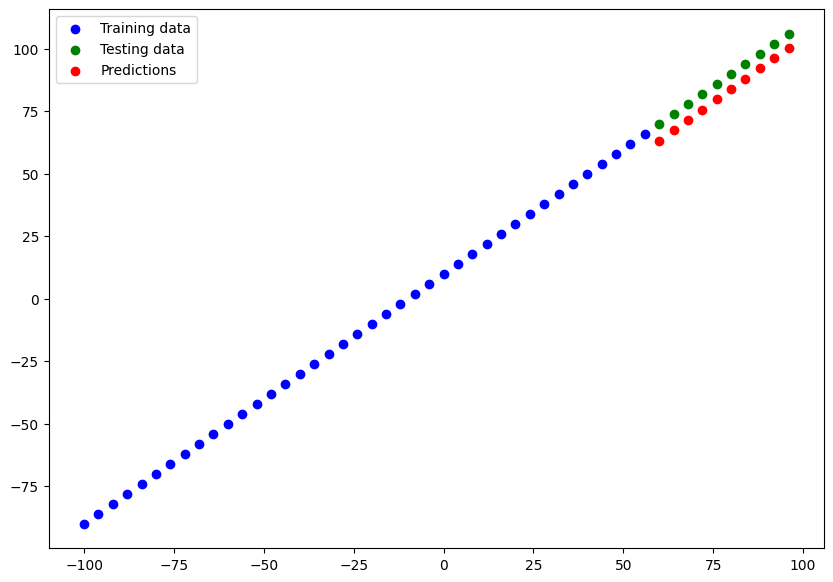

In [30]:
# plotting predictions for model_1
y_preds_1 = model_1.predict(x_test)
plot_predictions(predictions=y_preds_1)

In [31]:
# Calculating model_1 metrics
mae_1 = tf.keras.metrics.mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = tf.keras.metrics.mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(6.168175, 38.172783)

**model_2**
#### This time I'll add an extra dense layer

In [32]:
# Setting random seed
tf.random.set_seed(42)

# Replicating original model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)  # adding a second layer
])

# Compiling the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fitting the model
model_2.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


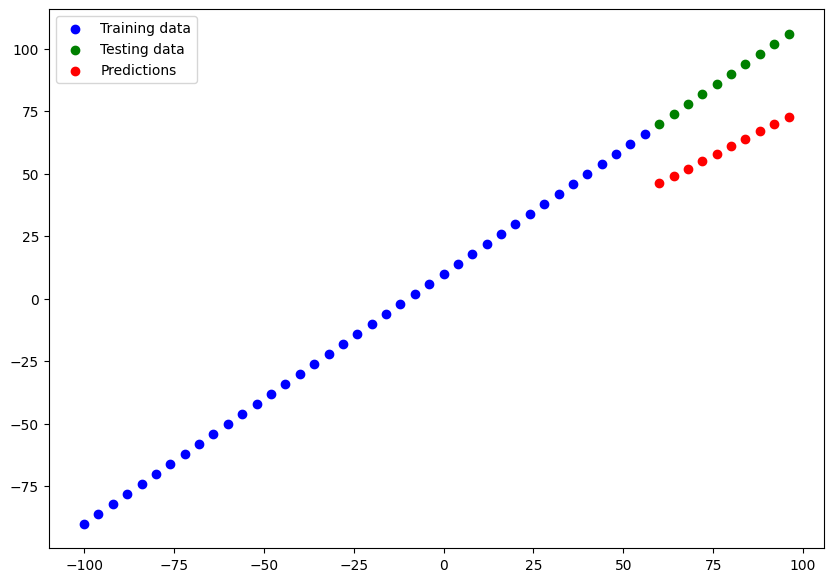

In [33]:
# plotting predictions for model_2
y_preds_2 = model_2.predict(x_test)
plot_predictions(predictions=y_preds_2)

In [34]:
# Calculating model_2 metrics
mae_2 = tf.keras.metrics.mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = tf.keras.metrics.mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(28.477655, 819.7759)

**model_3**
#### I will try with 500 epochs instead of 100

In [35]:
# Setting random seed
tf.random.set_seed(42)

# Replicating original model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)  # adding a second layer
])

# Compiling the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fitting the model
model_3.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


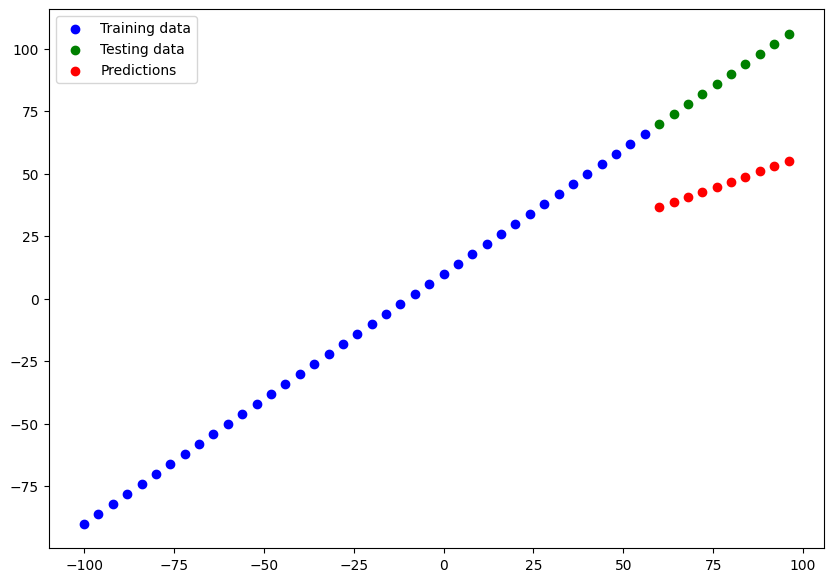

In [36]:
# plotting predictions for model_3
y_preds_3 = model_3.predict(x_test)
plot_predictions(predictions=y_preds_3)

In [37]:
# Calculating model_3 metrics
mae_3 = tf.keras.metrics.mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = tf.keras.metrics.mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(42.16475, 1809.6628)

# Comparing results

In [38]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [39]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,6.168175,38.172783
1,model_2,28.477655,819.775879
2,model_3,42.164749,42.164749


#### Here, model_1 performed best.

# Saving a model

#### There are two ways to save a model in TensorFlow:

1.   The SavedModel format (default).
2.   The HDF5 format.

#### The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

In [40]:
# Saving a model using the SavedModel format
model_2.save('/best_model_SavedModel_format.keras')

In [41]:
# Checking it out
!ls best_model_SavedModel_format

ls: cannot access 'best_model_SavedModel_format': No such file or directory


In [42]:
# Saving a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

In [43]:
# Checking it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


# Loading a model

In [44]:
# Loading a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("/best_model_SavedModel_format.keras")
loaded_saved_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [45]:
# Loading a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# Downloading a model (from Google Colab)

In [46]:
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# A larger example

In [47]:
# Reading in the insurance dataset
insurance = pd.read_csv("/insurance.csv")

In [48]:
# Checking out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [49]:
# Turning all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


#### Now I'll split data into features `(x)` and labels `(y)`.

In [50]:
# Creating x & y values
x = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [51]:
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [52]:
# Creating training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [53]:
# Setting random seed
tf.random.set_seed(42)

# Creating a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compiling the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fitting the model
insurance_model.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10393.9795 - mae: 10393.9795
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7735.4277 - mae: 7735.4277 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7391.6118 - mae: 7391.6118 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7279.7305 - mae: 7279.7305
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7376.2988 - mae: 7376.2988 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7483.3633 - mae: 7483.3633 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7728.7783 - mae: 7728.7783 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7504.2529 - mae: 7504.2529 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7688.4048 - mae: 7688.4048
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7620.2109 - mae: 7620.2109 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7600.4351 - mae: 7600.4351
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [54]:
# Checking the results of the insurance model
insurance_model.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6178.0908 - mae: 6178.0908  


[6032.65283203125, 6032.65283203125]

#### Model didn't perform very well, let's try a bigger model.

I'll try 3 things:

1. Increasing the number of layers (2 -> 3).
2. Increasing the number of units in each layer (except for the output layer).
3. Changing the optimizer (from SGD to Adam).

In [55]:
# Setting random seed
tf.random.set_seed(42)

# Adding an extra layer and increasing number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compiling the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

# Fitting the model and saving the history
history = insurance_model_2.fit(x_train, y_train, epochs=100, verbose=0)

In [56]:
# Evaluating the model
insurance_model_2.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4950.9761 - mae: 4950.9761  


[4808.10302734375, 4808.10302734375]

#### Much better! Using a larger model and the Adam optimizer results in almost half the error as the previous model.

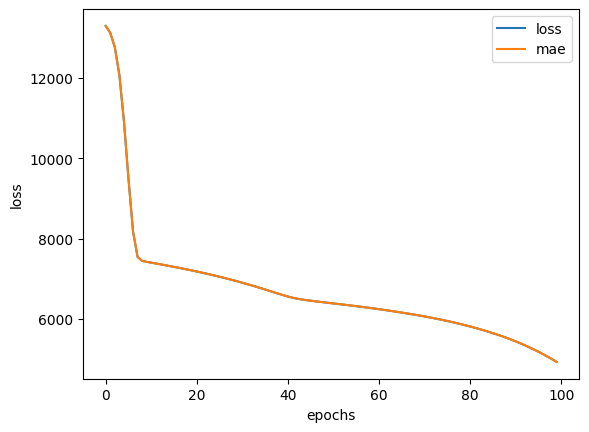

In [57]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [58]:
# Trying to train for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(x_train, y_train, epochs=100, verbose=0)

In [59]:
# Evaluating the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(x_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3470.3716 - mae: 3470.3716 


(3403.767578125, 3403.767578125)

#### Training for an extra 100 epochs made 10% decrease in error.

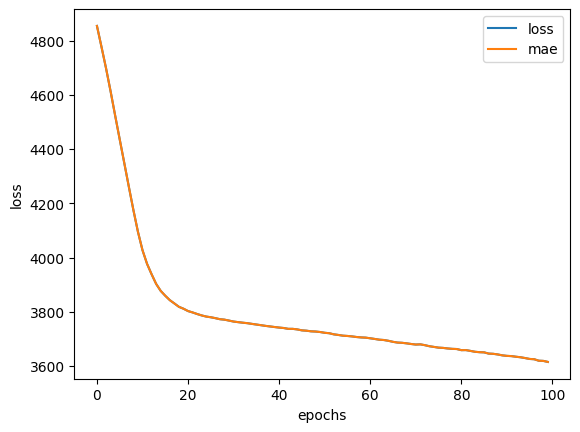

In [60]:
# Plotting the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show last 100 since I override the history variable

# Preprocessing data (normalization and standardization)


*   **Normalization** is the process of scaling data to a standard range, usually **0 to 1** or **-1 to 1**, to improve model performance.
*   **Standardization** scales data to have a **mean of 0** and a **standard deviation of 1**, making it easier for models to learn.



#### **Neural Network Data Preprocessing steps:**  

1. **Convert data to numbers** (NNs can't process strings).  
2. **Ensure correct input & output shapes**.  
3. **Feature Scaling:**  
   - **Normalization** (0 to 1): Subtract min, divide by (max - min).  
   - **Standardization** (mean = 0, variance = 1): Subtract mean, divide by std.  

#### I mostly use **normalization**, especially for images, but NNs can work with minimal scaling too.

In [61]:
insurance = pd.read_csv("/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### In order to do the normalization,


**make_column_transformer** - build a multi-step data preprocessing function for the folllowing transformations:
  
  * MinMaxScaler - make sure all numerical columns are normalized (between 0 and 1).
  *   OneHotEncoder - one hot encode the non-numerical columns.

    

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Creating column transformer (this will help me normalize/preprocess my data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Creating x & y
x = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Building my train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fitting column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(x_train)

# Transforming training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

#### Now I've normalized it and one-hot encoding it.

In [63]:
# Non-normalized and non-one-hot encoded data example
x_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [64]:
# Normalized and one-hot encoded example
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [65]:
# Noticing the normalized/one-hot encoded shape is larger because of the extra columns
x_train_normal.shape, x_train.shape

((1070, 11), (1070, 6))

#### Data is now normalized and numerical. It's ready to model now.

In [66]:
# Setting random seed
tf.random.set_seed(42)

# Building the model (3 layers; 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compiling the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fitting the model
insurance_model_3.fit(x_train_normal, y_train, epochs=200, verbose=0)

In [67]:
# Evaulating 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(x_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3213.8918 - mae: 3213.8918  


#### insurance_model_2 (trained on non-normalized data) vs insurance_model_3 (trained on normalized data):

In [68]:
insurance_model_2_mae, insurance_model_3_mae

(3403.767578125, 3161.0390625)

Normalizing the data reduced error by 10%, improving model performance. The key benefit is **faster convergence**, meaning the model reaches better results more quickly.